## Census API 

This notebook uses API (Application programming interface) to accesss data from the Census Bureau. In many cases the API requires a key in order to fetch data. In the case of the Census API a key is only required for more then 500 calls per day. Therefore, we will not require getting an API key to run this notebook (yay!). 


This notebook provides access to specific data provided through the Census Bureau API. The code is written so that it enables flexiblity in the type of data, granularity, and period. The Census API includes many datasets and can be personalized in multiple ways.  





In [1]:
%matplotlib inline 
import requests
import pandas as pd
import json
import pickle
import geopandas as gpd
import matplotlib 
import matplotlib.pyplot as plt
import geopandas as gpd
from variables import *

# ACS 2019 data columns 

Resources: 
- Census API page https://www.census.gov/data/developers/data-sets.html 
- Census API availvale datasets https://api.census.gov/data.html 


The code in the next section provides easy-to-use code snipts for accessing a pre-defined list variables based on topics. At this time race and age related variables are avaialble. Note that these variables are being loaded from the variables.py script and are imported in the import line. 

#### Race:
- Percent White
- Percetn Black
- Percent American Indian and Alaska Native
- Percent Asian 
- Percent NativeH awaiian and Other Pacific Islander
- Percent Some Other Race
- Percent Hispanic Or Latino

#### Age: 
-  Precent Age Under 5
- Precent Age 5 to 9
- Precent Age 10 to 14
- Precent Age 15 to 19
- Precent Age 20 to 24 
- Precent Age 25 to 34
- Precent Age 35 to 44
- Precent Age 45 to 54
- Precent Age 55 to 59 
- Precent Age 60 to 64
- Precent Age 65 to 74
- Precent Age 75 to 84 
- Precent Age 85 and Older


### How does it work? 

Data for each one of these group categories can be accessed from the 5 years estimates ACS data using the code below. To download given data you will need to specify the parameters in one cell (see details below), and then run the remaining code for the section without making any futher changes. Running these cells will fetch the data, make some formating transfroamtions, re-arrange the data, rename columns, create a map of the data, and eventually export the data as a csv file into your local machine.









In [2]:
# print list of variables 

print('Race -->',RACE)
print('Age -->',AGE)

Race --> DP05_0037PE,DP05_0038PE,DP05_0039PE,DP05_0044PE,DP05_0052PE,DP05_0057PE,DP05_0070PE
Age --> DP05_0005PE,DP05_0006PE,DP05_0007PE,DP05_0008PE,DP05_0009PE,DP05_0010PE,DP05_0011PE,DP05_0012PE,DP05_0013PE,DP05_0014PE,DP05_0015PE,DP05_0016PE,DP05_0017PE


# 1. Census Tract level data

Choose your list of variables for the API call

In [3]:
#Variables for base url
year='2017' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = RACE 
state='36'
county='005,047,061,081,085'

In [4]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=tract:*&in=state:{state}&in=county:{county}'
#data_url

In [5]:
#retrieve the data
response=requests.get(data_url)
print(response.text)

[["DP05_0037PE","DP05_0038PE","DP05_0039PE","DP05_0044PE","DP05_0052PE","DP05_0057PE","DP05_0070PE","state","county","tract"],
["84.5","5.9","0.0","6.3","0.0","1.6","6529","36","061","016500"],
["26.8","9.0","1.9","2.3","0.0","53.5","12283","36","061","027900"],
["74.6","3.4","0.0","19.4","0.0","1.1","1228","36","061","011203"],
["16.2","49.1","0.0","9.4","0.0","23.2","7459","36","061","018400"],
["83.6","3.4","0.0","5.7","0.0","4.2","5161","36","047","015900"],
["87.1","2.2","0.0","6.8","0.0","0.6","5800","36","047","016700"],
["34.9","36.6","0.0","19.0","0.0","1.9","2800","36","047","003100"],
["67.3","10.3","0.0","8.3","1.0","5.9","3336","36","047","004300"],
["81.1","3.4","0.4","5.1","0.0","4.4","2523","36","047","005100"],
["82.9","4.9","0.0","4.8","0.0","3.7","3581","36","047","006900"],
["80.8","0.0","0.0","7.3","0.0","6.7","1801","36","047","044800"],
["96.7","0.0","0.0","2.4","0.0","0.9","551","36","047","045000"],
["97.1","1.8","1.1","0.0","0.0","0.0","1602","36","047","04580

These results come in text form. We will transform them into json as an intermidiate step before turning them 
to a data frame 

# Transform API results into DataFrame


In [6]:
#make dataframe:

#1. turn response into json
popdata=response.json()
popdata 

# transforminto a DF

df=pd.DataFrame(popdata[1:], columns=popdata[0])

df

,DP05_0037PE,DP05_0038PE,DP05_0039PE,DP05_0044PE,DP05_0052PE,DP05_0057PE,DP05_0070PE,state,county,tract
0,84.5,5.9,0.0,6.3,0.0,1.6,6529,36,061,016500
1,26.8,9.0,1.9,2.3,0.0,53.5,12283,36,061,027900
2,74.6,3.4,0.0,19.4,0.0,1.1,1228,36,061,011203
3,16.2,49.1,0.0,9.4,0.0,23.2,7459,36,061,018400
4,83.6,3.4,0.0,5.7,0.0,4.2,5161,36,047,015900
...,...,...,...,...,...,...,...,...,...,...
2162,46.6,3.7,0.0,14.2,0.0,32.6,4907,36,047,002200
2163,76.2,5.4,0.0,11.7,0.0,0.8,1175,36,047,003700
2164,85.3,0.6,0.0,11.9,0.0,2.2,1378,36,047,004600
2165,68.7,15.4,0.0,6.7,0.0,4.1,2025,36,047,004700


# change column names using a dictionary 

Column names by default are generated from the API call as the variable codes. Which for the human eye are useless strings! That's where the .py script comes into play again. RACE_GROUPS is a dictionary that is used to inidcate which string belongs to which category. The result is a DataFrame that includes column names that are convinient for the human eye. 

In [7]:
df = df.rename(columns = RACE_GROUPS)
df

,PercentWhite,PercetnBlack,PercentAmericanIndianandAlaskaNative,PercentAsian,PercentNativeHawaiianandOtherPacificIslander,PercentSomeOtherRace,PercentHispanicOrLatino,state,county,tract
0,84.5,5.9,0.0,6.3,0.0,1.6,6529,36,061,016500
1,26.8,9.0,1.9,2.3,0.0,53.5,12283,36,061,027900
2,74.6,3.4,0.0,19.4,0.0,1.1,1228,36,061,011203
3,16.2,49.1,0.0,9.4,0.0,23.2,7459,36,061,018400
4,83.6,3.4,0.0,5.7,0.0,4.2,5161,36,047,015900
...,...,...,...,...,...,...,...,...,...,...
2162,46.6,3.7,0.0,14.2,0.0,32.6,4907,36,047,002200
2163,76.2,5.4,0.0,11.7,0.0,0.8,1175,36,047,003700
2164,85.3,0.6,0.0,11.9,0.0,2.2,1378,36,047,004600
2165,68.7,15.4,0.0,6.7,0.0,4.1,2025,36,047,004700


## Export as csv 

In [8]:
from datetime import date
#save csv using the data paremeters 

#1. get today's data 
today = date.today()
today = today.strftime("%d%m%y")

#2.save the data using the pre-defined parameters 
home= data+year+'_'+today 
df.to_csv(home+'.csv', sep=',')


## Name and save Data Frame as CSV 

# 2. Get data from API for ACS 5 years in ZCTA

## Set parameters for API



In [9]:
#load ZCTA list by borugh from pickle

with open('BXzip.pkl', 'rb') as f: 
    BXzip = pickle.load(f)
    
with open('BKzip.pkl', 'rb') as f: 
    BKzip = pickle.load(f)

with open('MNzip.pkl', 'rb') as f: 
    MNzip = pickle.load(f)
    
with open('SIzip.pkl', 'rb') as f: 
    SIzip = pickle.load(f)
    
with open('QNzip.pkl', 'rb') as f: 
    QNzip = pickle.load(f)

In [22]:
type(QNzip)

str

In [11]:
year='2019' 
data='acs'
data_name='acs5'
columns='B01001_002E,B06009_005E' 
state='36'
zip_code= BXzip + BKzip

#may hard code state and data type, data name can change but column names are not always the sameacross yers 
 



In [12]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=zip%20code%20tabulation%20area:{zip_code}&in=state:{state}'
data_url

'http://api.census.gov/data/2019/acs/acs5?get=B01001_002E,B06009_005E&for=zip%20code%20tabulation%20area:10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10471, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10472, 10469, 10470, 10473, 10474, 1047511201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11226, 11224, 11225, 11228, 11229, 11230, 11231, 11232, 11236, 11233, 11237, 11238, 11234, 11239, 11235, 11425&in=state:36'

In [13]:
#retrieve the data
response=requests.get(data_url)
#print(response.text)
# find way to give feedbak: success/or unsuccessful instead of printing the response

In [14]:
#make dataframe:

#1. turn response into json
popdata=response.json()
popdata 
#DF
dfZCTA =pd.DataFrame(popdata[1:], columns=popdata[0])


popdata[1:2][:1]




[['17959', '11766', '36', '11222']]

In [15]:
dfZCTA.head(3)


,B01001_002E,B06009_005E,state,zip code tabulation area
0,17959,11766,36,11222
1,36706,9309,36,11233
2,37786,16947,36,11235


## Plotting

/Users/Bennyw/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


(-74.28613989999997, -73.62075209999998, 40.4749613499998, 40.93624964999982)

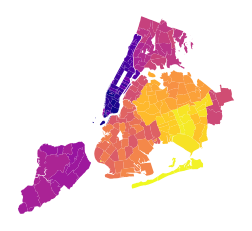

In [18]:
nycZCTA = gpd.read_file('zcta/zctashape')
nycZCTA.plot(column='zcta', colormap ='plasma')
plt.axis('off')

## Merge ZCTA shapfile with ACS API results

/Users/Bennyw/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:627: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


(-74.05638354999998, -73.75076944999998, 40.55284614999981, 40.93254084999982)

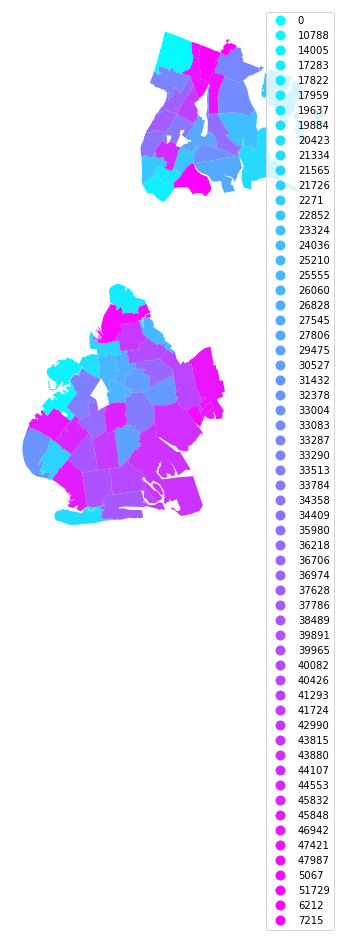

In [23]:
#merge inner all NYC ZCTA and the API results
bxplot = nycZCTA.merge(dfZCTA, left_on='zcta', right_on='zip code tabulation area')
#need to generalize so that columns are generatede in plot script based on DF columns
bxplot.plot(column='B01001_002E',colormap='cool', k=4,legend=True, figsize=(12,10))
plt.axis('off')

## Save data as ShapeFile 

In [24]:
bxplot.to_file('CensusZCTA.shp')

<ipython-input-24-f6ec9b4c62f3>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  bxplot.to_file('CensusZCTA.shp')


## Your turn:

Go through all sections of this notebook as well as the Census Bureau's API documentation (https://www.census.gov/data/developers/data-sets.html). Take your time to familiarize yourself with the Census' developers page and the diffrent datasets available.

Use the existing code to branch out and create soemthing new. Here are some initial/partial *ideas*: 

1. Write a program that fetchs data in a diffrent geogrpahical unit (i.e. not census tracts or ZCTA),and merge it with geogprahical data.
2. Write a program that fetches new types of data and time periods. 
3. Add a new set of variables to the variables.py script, then make the needed changes to the code so that it runs the data and renames the columns.
4. Add other functionalities not specified in this notebook. These can be automating the notebook or generlizing it in a way that enables scaliblity and sustianability of the code. 

**Important:**
- Keep your code clean, organized, and reproducible. 
- Remove un-needed cells or sections. Carefully consider every part of your answer and make sure all sections fit together. 
- Use markdowns to explain your work and thought process. 
- If needed: include data visualizations. 


# 3. Get data from API for ACS 5 years in State for 2019 

In [ ]:
#Variables for base url
year='2019' 
data='acs'
data_name='acs5/profile'
# this comes from the list of variables 
columns = RACE 
state='36'
county='005,047,061,081,085'

In [ ]:
#first set the base url for acs19
acs_url = f'http://api.census.gov/data/{year}/{data}/{data_name}'
#now set the the data url
data_url = f'{acs_url}?get={columns}&for=tract:*&in=state:{state}&in=county:{county}'
#data_url

In [ ]:
#retrieve the data
response=requests.get(data_url)
print(response.text)